In [199]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math

import my_lib_santanastasio as my

import rotolamento as rt

In [200]:
def get_intervals(time, data, bottom,top):
    
    intervals = []
    indexes = []
    x = 0
    while x < len(time)-5:
        temp_bt = None
        
        #over bottom
        if data[x] >= bottom and data[x] <= top:
            temp_bt = x
            
            while data[x] >= bottom and data[x] <= top and x < len(time)-5 :
                x += 5
            
            #if over top
            if data[x] >= top:
                intervals.append([time[temp_bt],time[x]])
                indexes.append([temp_bt,x])
                
                while x < len(time)-5 and data[x] >= bottom:
                    x += 5
                    
        x += 5
                             
    return intervals,indexes

In [216]:
df = pd.read_csv('data-25deg.csv')

data_time = df['Time (s)'].to_numpy()
data_y = df['Gyroscope y (rad/s)'].to_numpy()

#intervals = [ 
#        [6.137,6.51],
#        [16.345,16.71],
#        [26.49,26.85],
#        [45.245,45.59],
#        [56.66,57.03],
#    
#        [82.17,82.52],
#        [105.91,106.275],
#        [122.63,123.0],
#        [148.2,148.56],
#        [187.6,187.98],
#    
#        [215.653,216.015],
#        [249.85,250.23],
#        [276.762,277.145],      
#]


intervals=[[ 6.22435529,6.47452578], [ 16.44140536,16.68156928], [ 26.577961,68 ,26.8181202 ] ,[ 45.33051284,45.5706727], 
           [ 56.75800231,56.99816687], [ 82.26496809,82.51513134], [106.0007281,106.240887 ], 
           [122.734669,122.9748286 ], [148.291861,148.5320285], [187.7081027,187.9582686 ], [215.7566253,216.0067936 ], 
           [249.9594759,250.19963 ], [276.8672463,277.1174126 ], [294.9593008,295.2094701], [313.1614997,313.4216734], 
           [340.2595935,340.509657 ], [ 373.0914269,373.3315851], [402.6211986,402.8713503 ], [436.0434822,436.2938803 ], 
           [470.6267384,470.876898]]

#Plot dataset
#plt.plot(data_time[:],data_y[:])


[ 5.29150712e+01  5.26024195e+01 -2.88197836e-02  5.34292325e+01
  5.36491235e+01  5.31102169e+01  5.29095626e+01  5.37790123e+01
  5.30639396e+01  5.28758232e+01  5.30503286e+01  5.29462737e+01
  5.24446269e+01  5.29268828e+01  5.27766271e+01  5.28856128e+01
  5.28149786e+01  5.23940600e+01  5.26069941e+01  5.30193844e+01]
[0.16989113 0.23546787 0.00269924 0.21829789 0.22065231 0.16282347
 0.15548673 0.23167872 0.20301286 0.24074948 0.20526013 0.2138889
 0.17485335 0.17725884 0.16564204 0.16260179 0.18861974 0.18493341
 0.15536631 0.15574526]


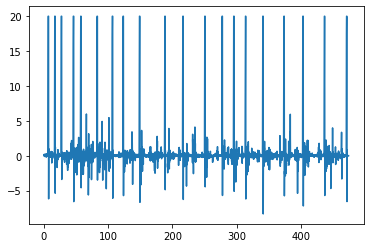

In [218]:
#Plot dataset
plt.plot(data_time,data_y)

# Eseguo il fit sul dataset negli intervalli
alpha_values = np.array([rt.m_from_fit(data_time,data_y,x[0],x[1]) for x in intervals ])
alpha_fit = alpha_values[:,0] #array valori attesi
salpha_fit = alpha_values[:,1] #array incertezze

print(alpha_fit)
print(salpha_fit)

In [219]:
#inferenza prior non vaga
#alpha_best = sum(alpha_fit*(1/salpha_fit**2))/sum(1/salpha_fit**2)
#salpha_best = 1/np.sqrt(sum(1/salpha_fit**2))

#oppure calcolarla con media
alpha_best = alpha_fit.mean()
salpha_best = np.std(alpha_fit,ddof=1)/np.sqrt(len(alpha_fit))

print(alpha_best)
print(salpha_best)

rt.PrintResult("Aplha",alpha_best,salpha_best,2,"[Rad/s]" )

50.30856752573809
2.6504893007440993
Aplha= 50.31 ± 2.65 [Rad/s] [5.27%]


In [220]:
dtab = pd.DataFrame(data={
    'Alpha' : alpha_fit,
    'Sigma Alpha' : salpha_fit,
})

dtab

,Alpha,Sigma Alpha
0,52.915071,0.169891
1,52.602419,0.235468
2,-0.028820,0.002699
3,53.429232,0.218298
4,53.649124,0.220652
5,53.110217,0.162823
6,52.909563,0.155487
7,53.779012,0.231679
8,53.063940,0.203013
9,52.875823,0.240749


In [221]:
# Seconda Parte
## Misura Dell'accelerazione di gravità

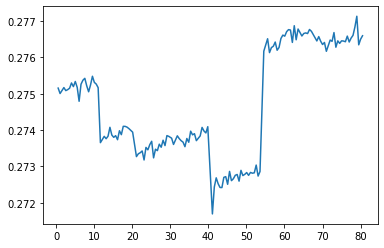

Angolo= 0.275 ± 0.0 [Rad] [0.00%]
Angolo= 15.737 ± 0.017 [Deg] [0.11%]



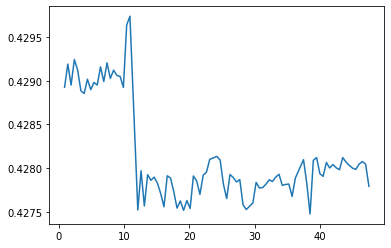

Angolo= 0.428 ± 0.0 [Rad] [0.00%]
Angolo= 24.531 ± 0.011 [Deg] [0.04%]



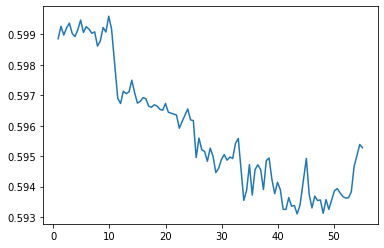

Angolo= 0.596 ± 0.001 [Rad] [0.17%]
Angolo= 34.137 ± 0.057 [Deg] [0.17%]



In [222]:
# analizzo il dataset degli angoli e ne ricavo valore atteso e incertezza
angle_files = [ ['inclinazione-15deg.csv', 5],['inclinazione-25deg.csv',3], ['inclinazione-35deg.csv',2] ]
angles = np.array([ rt.get_angle_from_data(data,nmis) for data,nmis in angle_files ])

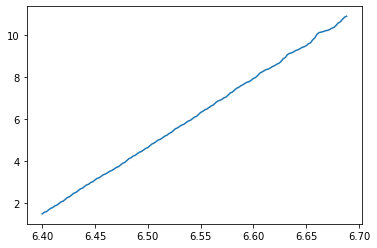

In [223]:
# analizzo dataset singola misura
# ricavo alpha e incertezza tramite fit

alphas_files = ['data-15deg.csv','data-35deg.csv']
intervals_2 = [ [6.4,6.69] , [6.575,6.72] ]

#tramite questa funzione puoi trovare l'intervallo in cui analizzare il dataset
plt = rt.plot_gyro_phyphox(alphas_files[0],intervals_2[0])


(32.546077216220716, 0.04149770079732199)

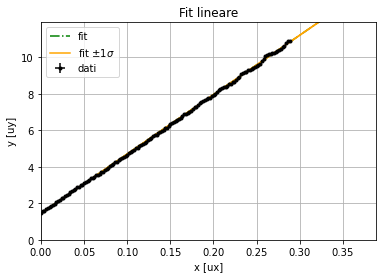

In [224]:
rt.fit_from_gyro_phyphox(alphas_files[0],intervals_2[0])

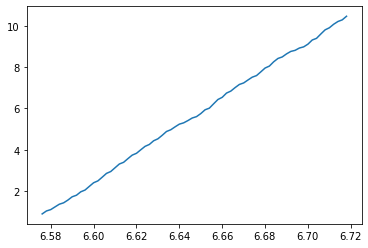

In [225]:
plt2 = rt.plot_gyro_phyphox(alphas_files[1],intervals_2[1])

(68.00965092565387, 0.19112001373348816)

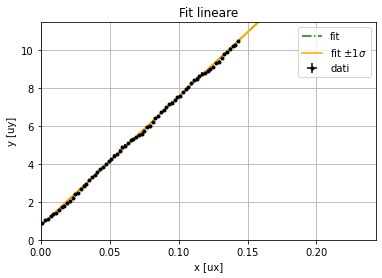

In [226]:
rt.fit_from_gyro_phyphox(alphas_files[1],intervals_2[1])

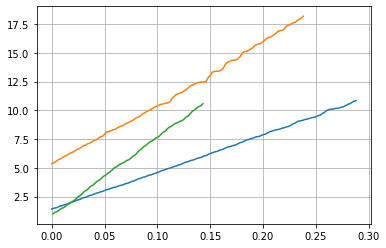

In [227]:
# punto 7 - 2
# fluttuazioni relative nella misura di α per un diverso angolo del piano

files = [
    pd.read_csv(alphas_files[0]),
    pd.read_csv("data-25deg.csv"),#file delle 10 misure
    pd.read_csv(alphas_files[1])
]

intervals_3 = [
    intervals_2[0],
    intervals[4],#un intervallo a caso delle 10 misure del primo punto
    intervals_2[1]
] 

for n in range(0,3):
    df = files[n]
    y = df['Gyroscope y (rad/s)'].to_numpy()
    x = df['Time (s)'].to_numpy()
    ind_start = rt.time_to_index(x,intervals_3[n][0])
    ind_finish = rt.time_to_index(x,intervals_3[n][1])
    plt.plot(x[ind_start:ind_finish]-intervals_3[n][0], y[ind_start:ind_finish]-y[0])

plt.grid()

In [228]:


aplha_fit = [ rt.fit_from_gyro_phyphox(alphas_files[x],intervals_2[x],plot=False)  for x in range(0,2)]

aplha_angles_dataset = np.array([ 
   # [ angle, sangle, aplha, saplha]
   [ angles[0][0], angles[0][1], aplha_fit[0][0], aplha_fit[0][1] ],#angolo circa 15 deg
   [ angles[1][0], angles[1][1], alpha_best, salpha_best ],
   [ angles[2][0], angles[2][1], aplha_fit[1][0], aplha_fit[1][1] ],#angolo circa 35 deg
])


In [229]:
x = aplha_angles_dataset[:,0] #angle
sx = aplha_angles_dataset[:,1] #sangle
y = aplha_angles_dataset[:,2] #alpha
sy = aplha_angles_dataset[:,3] #saplha

dtab = pd.DataFrame(data={
    'Angle' : x,
    'Sigma Angle' : sx,
    'Alpha' : y,
    'Sigma Alpha' : sy,
    'SAplha/Alpha' : [ sy[x]/y[x] for x in range(0,3)]
})

dtab


,Angle,Sigma Angle,Alpha,Sigma Alpha,SAplha/Alpha
0,0.274666,0.000296,32.546077,0.041498,0.001275
1,0.428150,0.000191,50.308568,2.650489,0.052685
2,0.595808,0.001000,68.009651,0.191120,0.002810


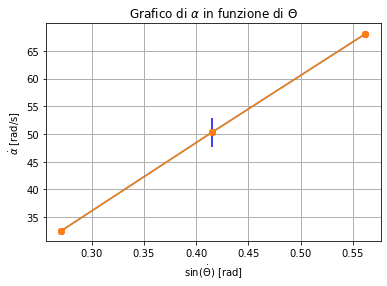

In [230]:
x = np.sin(x)
sx = np.cos(x)*sx# da rivedere derivata parziale

plt.plot(x,y)
plt.errorbar(x, y, xerr=sx,yerr=sy,ecolor='b', fmt='-o')
plt.plot(x,y,'ro')

plt.grid(linestyle='-', linewidth=1)

plt.xlabel("sin($\dot{\Theta}$) [rad]")
plt.ylabel(r"$\dot{\alpha}$ [rad/s]")
plt.title(r'Grafico di $\alpha$ in funzione di $\Theta$ ')

plt.show()

m         =  122.3096
sigma(m)  =  0.6741
c         =  -0.6274
sigma(c)  =  0.1959
cov(m, c) =  -0.1292
rho(m, c) =  -0.9783


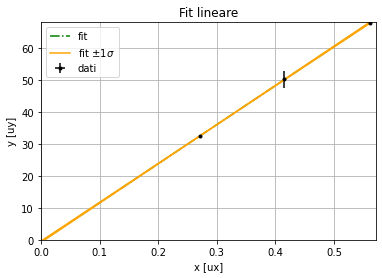

In [256]:
# fit a sin(theta)
ux=sx
uy=sy
m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(x, y, uy, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)


m         =  122.3099
sigma(m)  =  0.7722
c         =  -0.6275
sigma(c)  =  0.2287
cov(m, c) =  -0.1719
rho(m, c) =  -0.9732


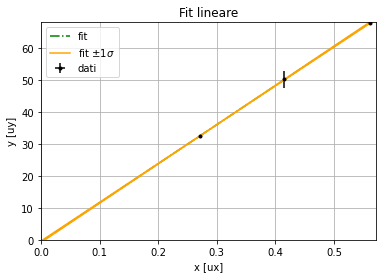

In [257]:
# nuove y
uy_new = np.sqrt(uy**2+(m0*ux)**2)
m, sm, c, sc, cov, rho = my.lin_fit(x, y, uy_new, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)

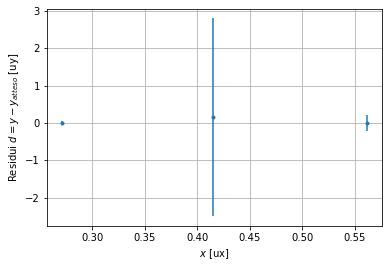

In [250]:
# studio dei residui
y_atteso = m*x + c
d = y - y_atteso
d_norm = d / uy_new
plt.errorbar(x,d,uy_new,marker='.',linestyle="")
plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
plt.xlabel("$x$ [ux]")
plt.grid()

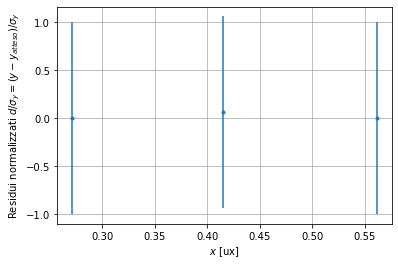

In [251]:
plt.errorbar(x,d_norm,uy_new/uy_new,marker='.',linestyle="")
plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
plt.xlabel("$x$ [ux]")
plt.grid()

In [ ]:
 # Incertezze a posteriori
sigmy_post = math.sqrt( np.sum(d**2)/(d.size-2) )
uy_post = np.repeat(sigmy_post,y.size)
print (sigmy_post)

# Nuovo fit con incertezze a posteriori sulle y
m1, sm1, c1, sc1, cov1, rho1 = my.lin_fit(x, y, uy_post, "X [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)

return m1,sm1

In [240]:
# telefono/sensore rettangolare
tel = {
    'I_cm': None,
    'sI_cm':None,
    'm' : 0.150,#kg
    'sm' : 0.025/np.sqrt(12),
    'l_a' : 0.072,#m
    'l_b' : 0.01,#m
    'sl' : 0.001/np.sqrt(12),
}

dev_m = (tel['l_a']**2+tel['l_b']**2)/12
dev_a = tel['l_a']*tel['m']/6
dev_b = tel['l_b']*tel['m']/6

tel['I_cm'] = (tel['m']*(tel['l_a']**2 + tel['l_b']**2))/12
tel['sI_cm'] = np.sqrt( (dev_m*tel['sm'])**2 + (dev_a*tel['sl'])**2 + (dev_b*tel['sl'])**2 )



# cilindro che rotola
rot = {
    'I_cm' : None,
    'sI_cm': None,
    'm' : 0.163,#kg
    'sm' : 0.025/np.sqrt(12),
    'r_ext' : 0.102/2,#m
    'r_int' : 0.076/2,#m
    'sr' : 0.001/np.sqrt(12),
}

dev_m = (rot['r_ext']**2+rot['r_int']**2)/2
dev_a = rot['r_ext']*rot['m']
dev_b = rot['r_int']*rot['m']

rot['I_cm'] = (rot['m']*(rot['r_ext']**2 + rot['r_int']**2))/2
rot['sI_cm'] = np.sqrt( (dev_m*rot['sm'])**2 + (dev_a*rot['sr'])**2 + (dev_b*rot['sr'])**2 )


#tot
Icm_tot = tel['I_cm'] + rot['I_cm']
sIcm_tot = np.sqrt(rot['sI_cm']**2+tel['sI_cm']**2)

rt.PrintResult("Icm: ", Icm_tot,sIcm_tot,5,"[kg*m^2]")

Icm: = 0.0004 ± 2e-05 [kg*m^2] [5.00%]


In [241]:
# gravità
R = rot['r_ext']
sR = rot['sr']
M = rot['m'] + tel['m']
sM = rot['sm']

dev_m = Icm_tot/(M*R) + R
dev_I = m/(M*R)
dev_M = (m*Icm_tot)/(R*M**2)
dev_R = (-m*Icm_tot)/(R*M**2) + m

g = m*(Icm_tot+M*R**2)/(M*R)
sg = np.sqrt( (dev_m*sm)**2 + (dev_I*sIcm_tot)**2 + (dev_M*sM)**2 + (dev_R*sR)**2 )


if g >= 8 and g <= 11:
    print("Sempre sia lodato! \n")
else: 
    print("Ancora non lodato! :( \n")

rt.PrintResult("Gravità: ",g,sg,4,"[N/kg]")


Sempre sia lodato! 

Gravità: = 9.2695 ± 0.1511 [N/kg] [1.63%]
